<a href="https://colab.research.google.com/github/Gabuni19/Codigos-Shorts/blob/main/Regresion_Lineal_ArchivoCSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion lineal

Conjunto de Datos

In [2]:
import pandas as pd

#Leemos nuestro conjunto de datos
df = pd.read_csv("datasets/Data_2.csv")

In [6]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0.5, 1.0, 'Distribución de YearsExperience')

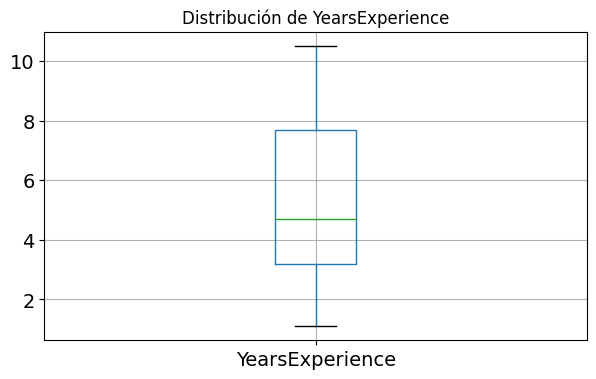

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

df.boxplot(column='YearsExperience',figsize=(7,4),fontsize=14)
plt.title("Distribución de YearsExperience")

Text(0.5, 1.0, 'Distribución de Salary')

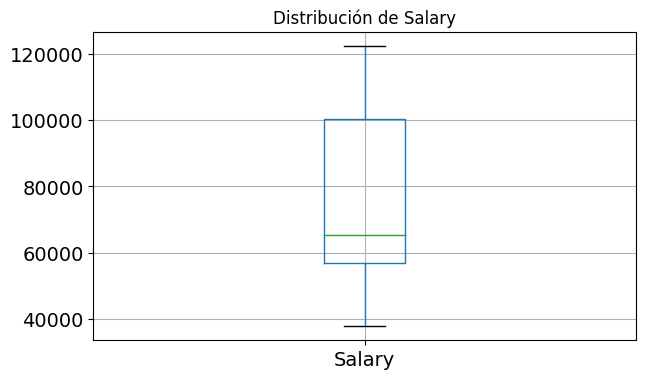

In [17]:
df.boxplot('Salary',figsize=(7,4),fontsize=14)
plt.title("Distribución de Salary")

# Calculos de las funciones auxiliares para la Regresion Lineal

Funcion Hipotesis:
$$h_\theta(x)= \theta_0+\theta_1x $$

Funcion de Coste:
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (\theta_0+\theta_1(x^{(i)}) - y^{(i)})^2$$

Derivada respecto de theta0 y theta1:
$$\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})
$$
$$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})x^{(i)}
$$


In [28]:
import numpy as np
def FuncionCoste(x,y):
  """Funcion que retorna una funcion de coste lambda que
    mide el error cuadratico medio (MSE) de cierto conjunto
    de datos (x,y) con respecto a cierto modelo representado por
    los parametros (theta0,theta1) que se debe pasar a esta
    lambda.

    Parametros Posicionales
    [+] x -- Conjunto de datos de entrada - tipo:numpy o columnaDataframe
    [+] y -- Conjunto de targets - tipo:numpy o columnaDataframe

    Nota: El arreglo x e y deben tener la misma dimension
  """
  m = len(x)
  return lambda theta0,theta1 : 1/(2*(m)) * np.sum( (theta0 + theta1*x - y )**2)

def derivada_theta0(x,y):
  return lambda theta0,theta1: (1/len(x))*np.sum(theta0+theta1*x-y)

def derivada_theta1(x,y):
  return lambda theta0,theta1: (1/len(x))*np.sum((theta0+theta1*x-y)*x)



In [29]:
#Separamos la caracteristica X y la medicion Y
X = df["YearsExperience"]
Y = df["Salary"]

In [82]:
import numpy as np

def AgregarParametros(p,theta0,theta1,costo):
  p['theta0'].append(theta0)
  p['theta1'].append(theta1)
  p['J(theta)'].append(costo)

def RegresionLineal(x,y,alpha=0.01,iter=10000,epsilon=0.01):
  parametros = {
      'theta0':[],
      'theta1':[],
      'J(theta)':[]
  }
  #Definimos nuestras Funciones
  J = FuncionCoste(X,Y)
  D0 = derivada_theta0(X,Y)
  D1 = derivada_theta1(X,Y)
  #Inicializamos con valores aleatorios
  theta0 = np.random.randint(-50,50)
  theta1 = np.random.randint(-50,50)

  #Agregamos estos valores al diccionario parametros
  AgregarParametros(parametros,theta0,theta1,J(theta0,theta1))

  i=0
  while(i<iter):
    #Almacenamos los valores de theta antes de cambiarlo
    actual_theta0 = theta0
    actual_theta1 = theta1

    #Con el metodo del gradiente cambiamos los valores de tetha
    theta0 = theta0 - alpha*D0(theta0,theta1)
    theta1 = theta1 - alpha*D1(theta0,theta1)
    #Agregamos estos valores al diccionario parametros
    AgregarParametros(parametros,theta0,theta1,J(theta0,theta1))

    #Verificamos la convergencia
    if(np.abs(theta0 - actual_theta0)<epsilon and np.abs(theta1 - actual_theta1)<epsilon):
      return theta0,theta1,parametros

    i+=1

  return theta0,theta1,parametros

#Almacenamos los parametros de la Regresion Lineal
thetha0,thetha1, df_para = RegresionLineal(X,Y)


In [83]:
#Imprimos el valor de thetha y como va disminuyendo la Funcion de Coste hasta converger
df_parametros = pd.DataFrame(df_para)
df_parametros

,theta0,theta1,J(theta)
0,23.000000,-43.000000,3.270286e+09
1,785.084733,4704.759998,1.364306e+09
2,1287.284305,7715.851566,5.958206e+08
3,1624.472549,9624.532385,2.858071e+08
4,1856.874336,10833.421715,1.606093e+08
...,...,...,...
3996,25787.483769,9450.660760,1.563548e+07
3997,25787.493823,9450.659271,1.563548e+07
3998,25787.503856,9450.657785,1.563548e+07
3999,25787.513867,9450.656303,1.563548e+07


Graficamos

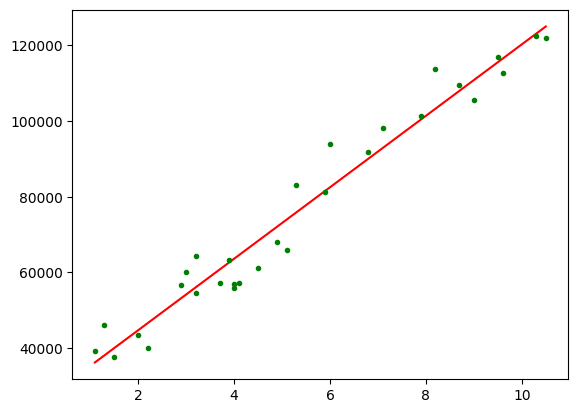

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X,thetha0+thetha1*X,"r-")
plt.plot(X,Y,"g.")
plt.show()

Podemos graficar como va convergiendo los valores de thetha0 y thetha1 al minimo de la funcion de

In [77]:
#Interamos graficar la Funcion de Coste con varios puntos(1000 puntos)
grafica = {
    "thetha0":[],
    "thetha1":[] ,
    "J(theta)":[]
}

# Crea una cuadrícula de valores para theta0 y theta1
theta0_values = np.linspace(10000, 30000, 100)
theta1_values = np.linspace(10000, 30000, 100)


J = FuncionCoste(X,Y)
# Evaluamos la Función de Costo en cada par de parámetros
for theta0 in theta0_values:
    for theta1 in theta1_values:
        costo = J(theta0, theta1)
        grafica["thetha0"].append(theta0)
        grafica["thetha1"].append(theta1)
        grafica["J(theta)"].append(costo)

In [78]:
df_FuncionCoste = pd.DataFrame(grafica)
df_FuncionCoste

,thetha0,thetha1,J(theta)
0,10000.0,10000.000000,9.962730e+07
1,10000.0,10202.020202,8.741303e+07
2,10000.0,10404.040404,7.666867e+07
3,10000.0,10606.060606,6.739424e+07
4,10000.0,10808.080808,5.958972e+07
...,...,...,...
9995,30000.0,29191.919192,7.484523e+09
9996,30000.0,29393.939394,7.633419e+09
9997,30000.0,29595.959596,7.783785e+09
9998,30000.0,29797.979798,7.935621e+09


Grafica 3D de la Funcion Coste

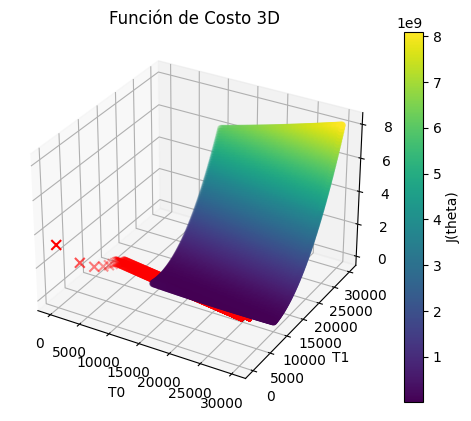

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd

#Creamos una figura tridimensional
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Asigna colores en función de J(theta) para visualizar la superficie
sc = ax.scatter(grafica["thetha0"], grafica["thetha1"], grafica["J(theta)"], c=grafica["J(theta)"], cmap='viridis', marker='o')
fig.colorbar(sc, ax=ax, label='J(theta)')
ax.set_xlabel('T0')
ax.set_ylabel('T1')
ax.set_zlabel('Costo')
ax.set_title('Función de Costo 3D')

# Agrega los puntos de convergencia
convergencia_x = df_parametros['theta0']
convergencia_y = df_parametros['theta1']
convergencia_J = df_parametros['J(theta)']
ax.scatter(convergencia_x, convergencia_y, convergencia_J, c='red', marker='x', s=50, label='Convergencia')

plt.show()


GRAFICA INTERACTIVA

In [80]:
!pip install plotly

In [81]:

import plotly.graph_objects as go
import pandas as pd

# Asigna colores en función de J(theta) para visualizar la superficie
fig = go.Figure(data=[go.Scatter3d(
    x=grafica["thetha0"],
    y=grafica["thetha1"],
    z=grafica["J(theta)"],
    mode='markers',
    marker=dict(
        size=5,
        color=grafica["J(theta)"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Agrega los puntos de convergencia
fig.add_trace(go.Scatter3d(
    x=df_parametros['theta0'],
    y=df_parametros['theta1'],
    z=df_parametros['J(theta)'],
    mode='markers',
    marker=dict(
        color='red',
        size=5,
        symbol='cross'
    ),
    name='Convergencia'
))

fig.update_layout(scene = dict(
                    xaxis_title='Theta0',
                    yaxis_title='Theta1',
                    zaxis_title='Costo'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

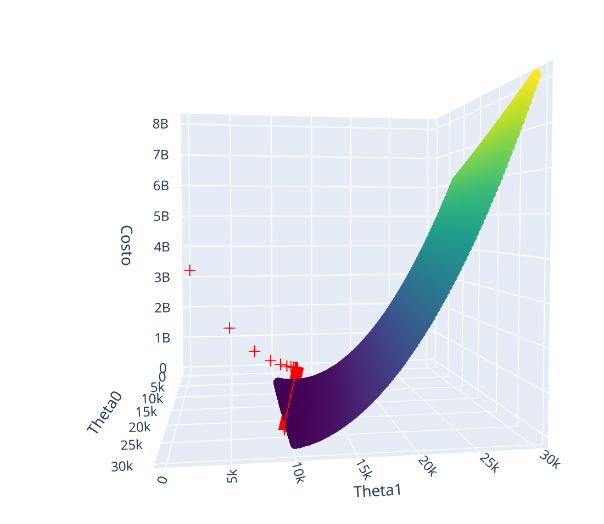